## Predicting the Burnout Rate Of Employees
#### Scope: Careers and Human Management
It's been discovered that employees tend to get tired and burnout due to various reasons...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.tail(12)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22738,fffe31003300340032003900,2008-12-23,Male,Service,Yes,0.0,1.0,4.9,0.29
22739,fffe32003300350034003100,2008-02-06,Male,Service,No,2.0,5.0,8.5,0.67
22740,fffe33003300380031003100,2008-09-05,Female,Product,No,3.0,6.0,7.3,0.55
22741,fffe31003600350034003800,2008-01-07,Male,Product,No,2.0,5.0,6.0,NaN
22742,fffe33003200310039003000,2008-07-28,Male,Product,No,3.0,5.0,8.1,0.69
22743,fffe3300390030003600,2008-12-15,Female,Product,Yes,1.0,3.0,6.0,0.48
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3.0,7.0,6.2,0.54
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72


## Cleaning the Data

In [3]:
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [4]:
df1 = df.dropna()

In [5]:
df1.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df1
df2.Gender = le.fit_transform(df2.Gender)
df2["WFH Setup Available"] = le.fit_transform(df2["WFH Setup Available"])
df2["Company Type"] = le.fit_transform(df2["Company Type"])
df2.head()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-6-97259eaf4d20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["WFH Setup Available"] = le.fit_transform(df2["WFH Setup Available"])
<ipython-input-6-97259eaf4d20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,1,0,1,2.0,4.0,3.6,0.29


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  int32  
 3   Company Type          18590 non-null  int32  
 4   WFH Setup Available   18590 non-null  int32  
 5   Designation           18590 non-null  float64
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 1.2+ MB


## Feature Engineering and Selection

In [8]:
df2.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [9]:
df2.describe()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000
mean,0.475686,0.654868,0.539537,2.179398,4.486552,5.732173,0.452444
std,0.499422,0.475424,0.498448,1.133148,2.044848,1.920547,0.197848
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.600000,0.320000
50%,0.000000,1.000000,1.000000,2.000000,4.000000,5.900000,0.450000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,7.100000,0.590000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,1.000000


In [10]:
#To check the rate of burn and the company type

df2.groupby("Company Type").count()

,Employee ID,Date of Joining,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Company Type,,,,,,,,
0,6416,6416,6416,6416,6416,6416,6416,6416
1,12174,12174,12174,12174,12174,12174,12174,12174


In [11]:
# To check the burn rate among the genders

df2.groupby("Gender").Gender.count().to_frame()

,Gender
Gender,
0,9747
1,8843


In [12]:
df2.corr()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Gender,1.000000,-0.009289,-0.073718,0.110514,0.141089,0.145760,0.156577
Company Type,-0.009289,1.000000,-0.000756,0.008989,0.005795,0.004697,0.005904
WFH Setup Available,-0.073718,-0.000756,1.000000,-0.231858,-0.285384,-0.277683,-0.307168
Designation,0.110514,0.008989,-0.231858,1.000000,0.877893,0.691823,0.736412
Resource Allocation,0.141089,0.005795,-0.285384,0.877893,1.000000,0.799563,0.855005
Mental Fatigue Score,0.145760,0.004697,-0.277683,0.691823,0.799563,1.000000,0.944389
Burn Rate,0.156577,0.005904,-0.307168,0.736412,0.855005,0.944389,1.000000


## Visualizing the data

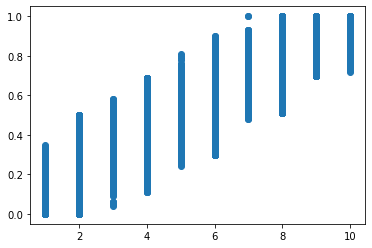

In [13]:
plt.scatter(df2['Resource Allocation'], df2['Burn Rate'])
plt.show()

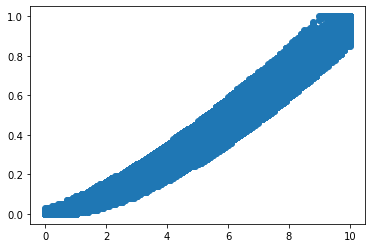

In [14]:
plt.scatter(df2["Mental Fatigue Score"], df2["Burn Rate"])
plt.show()

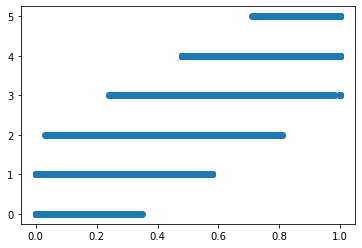

In [15]:
plt.scatter(df2["Burn Rate"], df2["Designation"])
plt.xticks
plt.show()

<AxesSubplot:ylabel='Density'>

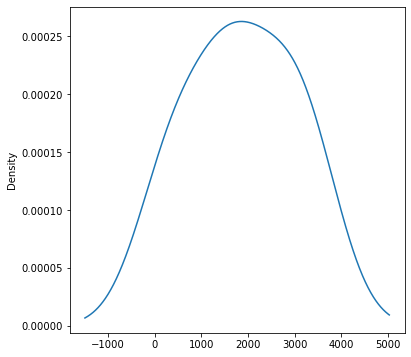

In [16]:
df2["Resource Allocation"].value_counts().plot(kind = 'density', figsize = (6,6))

<AxesSubplot:ylabel='Gender'>

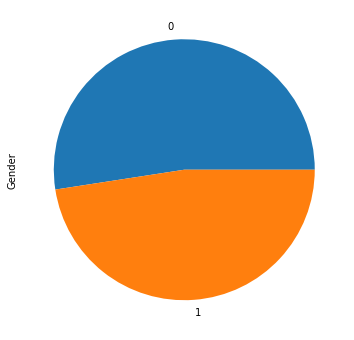

In [17]:
df2["Gender"].value_counts().plot(kind = 'pie', figsize = (6,6))

<AxesSubplot:>

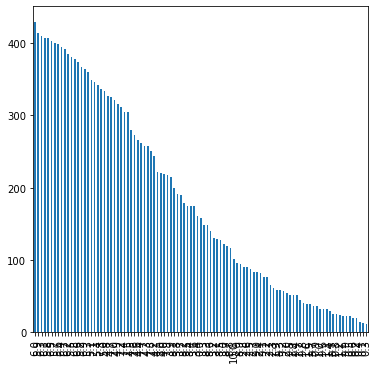

In [18]:
df2["Mental Fatigue Score"].value_counts().plot(kind = 'bar', figsize = (6,6))

<AxesSubplot:xlabel='Designation', ylabel='Burn Rate'>

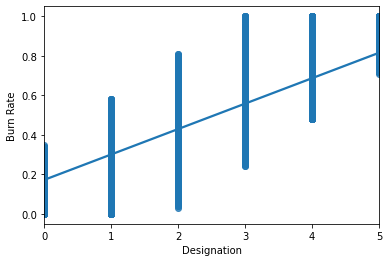

In [19]:
sns.regplot(x=  "Designation" ,   y=  "Burn Rate", data=df2) 

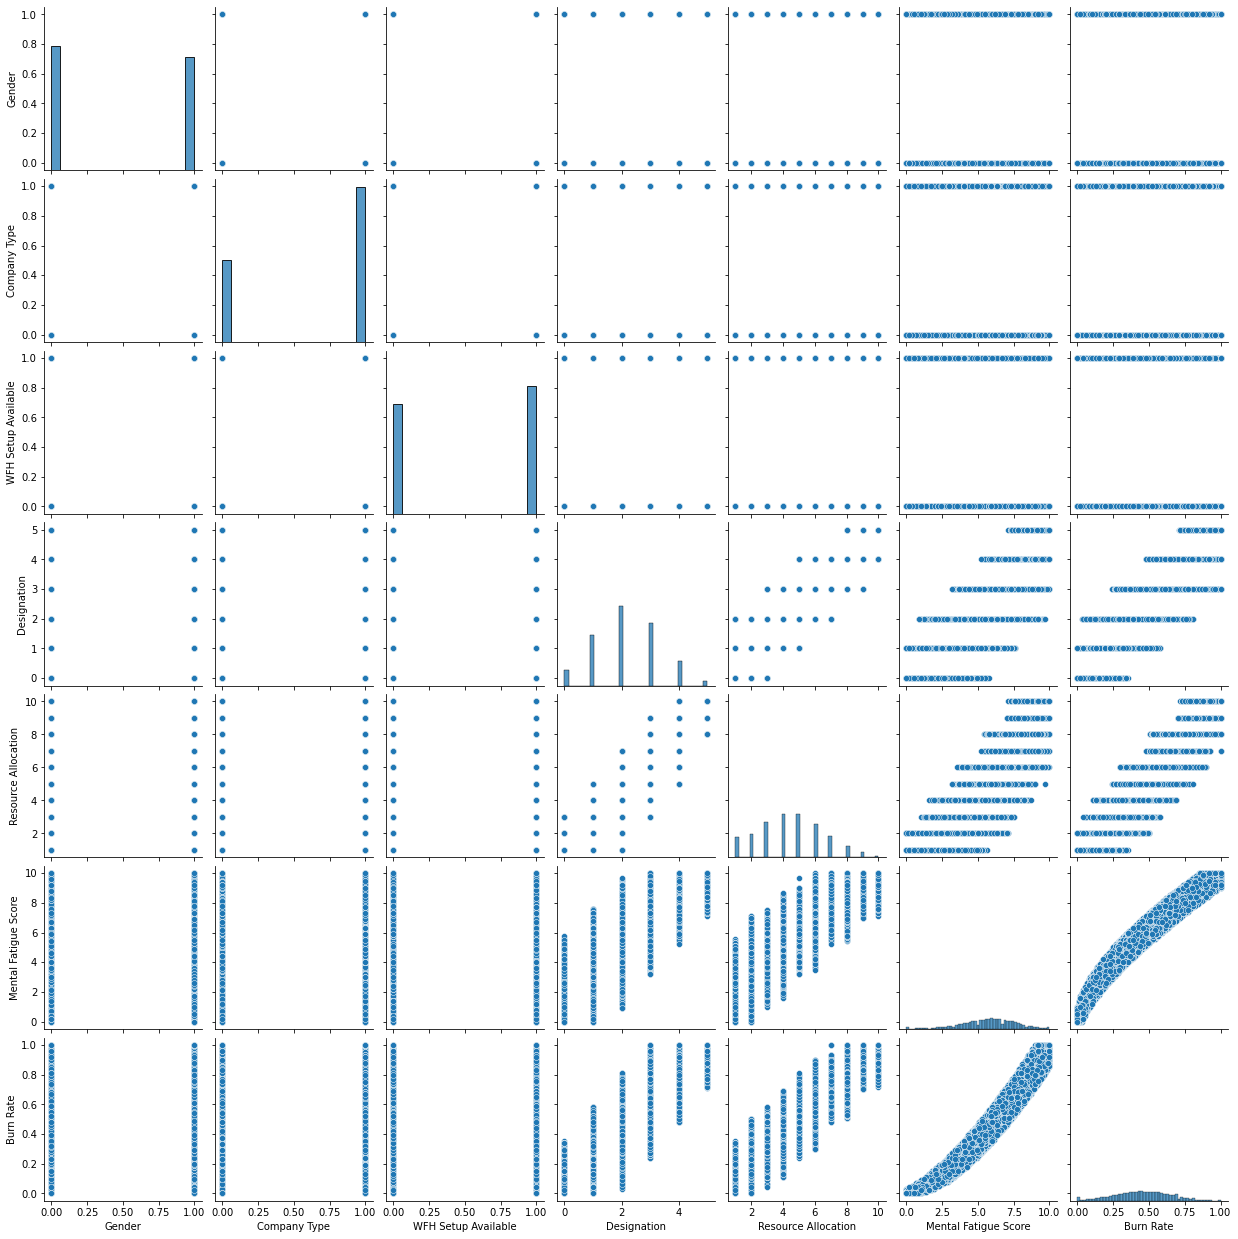

In [20]:
sns.pairplot(df2)

## Modeling the Data

In [21]:
y = df2["Burn Rate"]
X = df2.drop(["Burn Rate", "Date of Joining", "Employee ID"], axis=1)

In [22]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
Ridge_model = Ridge()
Ridge_model.fit(X_train, y_train)
Ridge_model.score(X_test, y_test)
predicted_ridge_value = Ridge_model.predict(X_test)

In [25]:
Lasso_model = Lasso()
Lasso_model.fit(X_train, y_train)
Lasso_model.score(X_test, y_test)
predicted_lasso_value = Lasso_model.predict(X_test)

In [26]:
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)
Linear_model.score(X_test, y_test)
predicted_linear_value = Linear_model.predict(X_test)

## To Measure the Model'sPerformance

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [28]:
# Checking the RSS value
rss = np.sum(np.square(y_test - predicted_linear_value))
rss

17.6382095023662

In [29]:
# Checking the mean absolute error value
MAE = mean_absolute_error(y_test, predicted_linear_value)
MAE

0.04601385943239418

In [30]:
# Checking the mean squared error value
MSE = np.sqrt(mean_squared_error(y_test, predicted_linear_value))
MSE

0.05623761912615699

In [31]:
# Checking the R-scored value
r2 = r2_score(y_test, predicted_linear_value)
r2

0.9199545808617396

## Using Class Functions to Model data

In [32]:
class model:
    def __init__(self, model, X_train, y_train, X_test, y_test):
        self.model = model()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
    def def_model(model, X_train, y_train, X_test, y_test):
        model = model()
        X_train = X_train
        y_train = y_train
        X_test = X_test
        y_test = y_test
        model = model.fit(X_train, y_train)
        Score = model.score(X_test, y_test)
        print("The Percentage Accuracy of the model: ", Score)
        preds = model.predict(X_test)
        return preds
    
    def predicted_values(model, X_test):
        model = model()
        X_test = X_test
        preds = model.predict(X_test)
        return preds

In [33]:
f = model.def_model(LinearRegression, X_train, y_train, X_test, y_test)
f

The Percentage Accuracy of the model:  0.9199545808617396


array([0.22129869, 0.41599313, 0.38464657, ..., 0.57660747, 0.83126133,
       0.50000318])

In [34]:
class metrics:
    def __init__(self, model, metric, y_test, preds):
        self.model = model()
        self.metric = metric
        self.y_test = y_test
        self.preds = preds
        
    def r2(model, metric, y_test, preds):
        metric = r2_score()
        r2 = r2_score(y_test, preds)
        return r2
    
    def mae(model, metric, y_test, preds):
        metric = mean_absolute_error()
        MAE = mean_absolute_error(y_test, preds)
        return MAE
    
    def mse(model, y_test, preds):
        metric = mean_squared_error()
        MSE = np.sqrt(mean_squared_error(y_test, preds))
        return MSE
    
    def rss(model, y_test, preds):
        rss = np.sum(np.square(y_test - preds))
        return rss

In [35]:
rss = metrics.rss(LinearRegression, y_test, f)
rss

17.6382095023662

## To Compare the effects of the Regularization

In [36]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df


linear_model_weights = get_weights_df(Linear_model, X_train, 'Linear_model_weights')
ridge_weights_df = get_weights_df(Ridge_model, X_train, 'Ridge_Weights')
lasso_weights_df = get_weights_df(Lasso_model, X_train, 'Lasso_Weights')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights2 = pd.merge(final_weights, lasso_weights_df, on='Features')

print(final_weights2)

               Features  Linear_model_weights  Ridge_Weights  Lasso_Weights
0   WFH Setup Available             -0.012704      -0.012701           -0.0
1           Designation             -0.005093      -0.005088            0.0
2          Company Type              0.000065       0.000065            0.0
3                Gender              0.004617       0.004617            0.0
4   Resource Allocation              0.029088       0.029088            0.0
5  Mental Fatigue Score              0.073509       0.073506            0.0


## Testing the data with the Test Set

In [37]:
test_df = pd.read_csv("test.csv_burnout")

test_df.head(5)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [38]:
#X = test_df.drop(["Date of Joining", "Employee ID"], axis=1)
#y = 

In [41]:
test_df.Gender = le.fit_transform(test_df.Gender)
test_df["WFH Setup Available"] = le.fit_transform(test_df["WFH Setup Available"])
test_df["Company Type"] = le.fit_transform(test_df["Company Type"])
test_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,0,1,0,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,0,0,1,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,1,0,1,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,0,1,0,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,0,0,0,2.0,5.0,6.4


In [45]:
val = Linear_model.predict(test_df.drop(["Employee ID", "Date of Joining"], axis=1))
val

array([0.61756299, 0.33884883, 0.42401105, ..., 0.80983922, 0.57266676,
       0.11123049])

In [48]:
test_df["Burn_rate"] = val
test_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn_rate
0,fffe31003300390039003000,2008-12-10,0,1,0,2.0,5.0,7.7,0.617563
1,fffe31003300310037003800,2008-08-14,0,0,1,1.0,2.0,5.2,0.338849
2,fffe33003400380035003900,2008-11-13,1,0,1,1.0,3.0,5.9,0.424011
3,fffe3100370039003200,2008-02-07,0,1,0,3.0,6.0,4.6,0.413680
4,fffe32003600390036003700,2008-07-17,0,0,0,2.0,5.0,6.4,0.521936


In [50]:
test_df_sub = test_df.drop(["Date of Joining","Gender", "Company Type", "WFH Setup Available", "Designation", "Resource Allocation", "Mental Fatigue Score"], axis=1)
test_df_sub

,Employee ID,Burn_rate
0,fffe31003300390039003000,0.617563
1,fffe31003300310037003800,0.338849
2,fffe33003400380035003900,0.424011
3,fffe3100370039003200,0.413680
4,fffe32003600390036003700,0.521936
...,...,...
12245,fffe3900310034003700,0.405072
12246,fffe32003600330034003000,0.443389
12247,fffe31003800340039003000,0.809839
12248,fffe32003600380031003800,0.572667


## My Submission

In [51]:
test_df_sub = test_df_sub.to_csv("test_df_sub.csv")